In [ ]:
##Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
##importing the dataset
data=pd.read_csv('TSLA_new.csv')
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,profit/loss
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.0
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-1.0
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-1.0
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-1.0
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-1.0


In [ ]:
## Slicing of data
data1=data.iloc[:,2:]
data1.head()

,Open,High,Low,Close,Adj Close,Volume,profit/loss
0,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.0
1,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-1.0
2,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-1.0
3,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-1.0
4,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-1.0


In [ ]:
##Separating the target variable and features
X=data1.drop('profit/loss',axis=1)
y=data1['profit/loss']

In [ ]:
X.head()

,Open,High,Low,Close,Adj Close,Volume
0,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
y.head()

0    1.0
1   -1.0
2   -1.0
3   -1.0
4   -1.0
Name: profit/loss, dtype: float64

In [ ]:
##Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
dfx=pd.DataFrame(data=X, columns=['Open','High','Low','Close','Adj Close','Volume'])
dfx.head()

,Open,High,Low,Close,Adj Close,Volume
0,-0.615400,-0.611338,-0.616832,-0.612359,-0.612359,2.276439
1,-0.610680,-0.607656,-0.612721,-0.612401,-0.612401,1.987486
2,-0.611229,-0.610713,-0.614884,-0.613703,-0.613703,0.346520
3,-0.612619,-0.612629,-0.615997,-0.615624,-0.615624,-0.216857
4,-0.614705,-0.614736,-0.618053,-0.617774,-0.617774,0.099157


In [ ]:
dfx.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3.192000e+03,3.192000e+03,3.192000e+03,3192.000000,3192.000000,3.192000e+03
mean,-1.424647e-16,-1.068485e-16,-7.123235e-17,0.000000,0.000000,-7.123235e-17
std,1.000157e+00,1.000157e+00,1.000157e+00,1.000157,1.000157,1.000157e+00
min,-6.173886e-01,-6.170254e-01,-6.186595e-01,-0.617990,-0.617990,-1.135625e+00
25%,-5.312505e-01,-5.309745e-01,-5.320895e-01,-0.532076,-0.532076,-6.361742e-01
50%,-4.577688e-01,-4.593622e-01,-4.566610e-01,-0.457952,-0.457952,-2.235174e-01
75%,-3.328946e-01,-3.352068e-01,-3.366271e-01,-0.331413,-0.331413,3.044222e-01
max,3.662343e+00,3.596219e+00,3.713781e+00,3.651014,3.651014,9.992912e+00


In [ ]:
##Implementing PCA
from sklearn.decomposition import PCA
pca = PCA (n_components=3)
dfx_pca = pca.fit(dfx)
dfx_trans=pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head()

,0,1,2
0,-1.275375,2.332043,-0.001511
1,-1.281955,2.043110,0.002733
2,-1.354606,0.403769,0.002360
3,-1.381955,-0.158952,0.002605
4,-1.373398,0.156977,0.002758


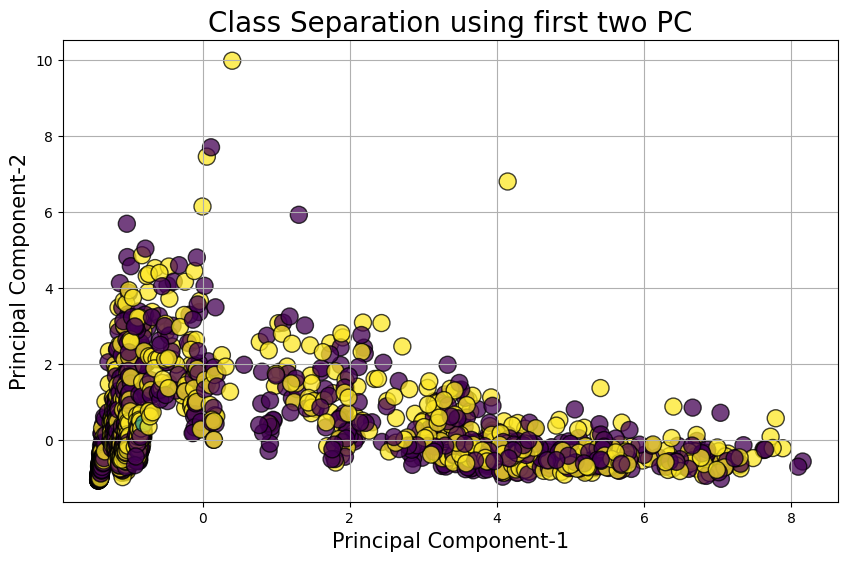

In [ ]:
##PLotting the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=data1['profit/loss'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class Separation using first two PC", fontsize=20)
plt.xlabel("Principal Component-1", fontsize=15)
plt.ylabel("Principal Component-2", fontsize=15)
plt.show()

**K-Nearest Neighbors**

In [ ]:
##Label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
X=dfx_trans
y

array([2, 0, 0, ..., 0, 2, 2])

In [ ]:
##Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set input: ",X_train.shape)
print("Test set input: ",X_test.shape)

Training set input:  (2553, 3)
Test set input:  (639, 3)


In [ ]:
##Applying KNN
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
##Making predictions with the help of test set
y_pred=classifier.predict(X_test)
y_pred

array([2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test

array([0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2,

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test, y_pred)

In [ ]:
cm

array([[172, 125],
       [159, 183]])

In [ ]:
ac

0.5555555555555556

**Decision Tree**

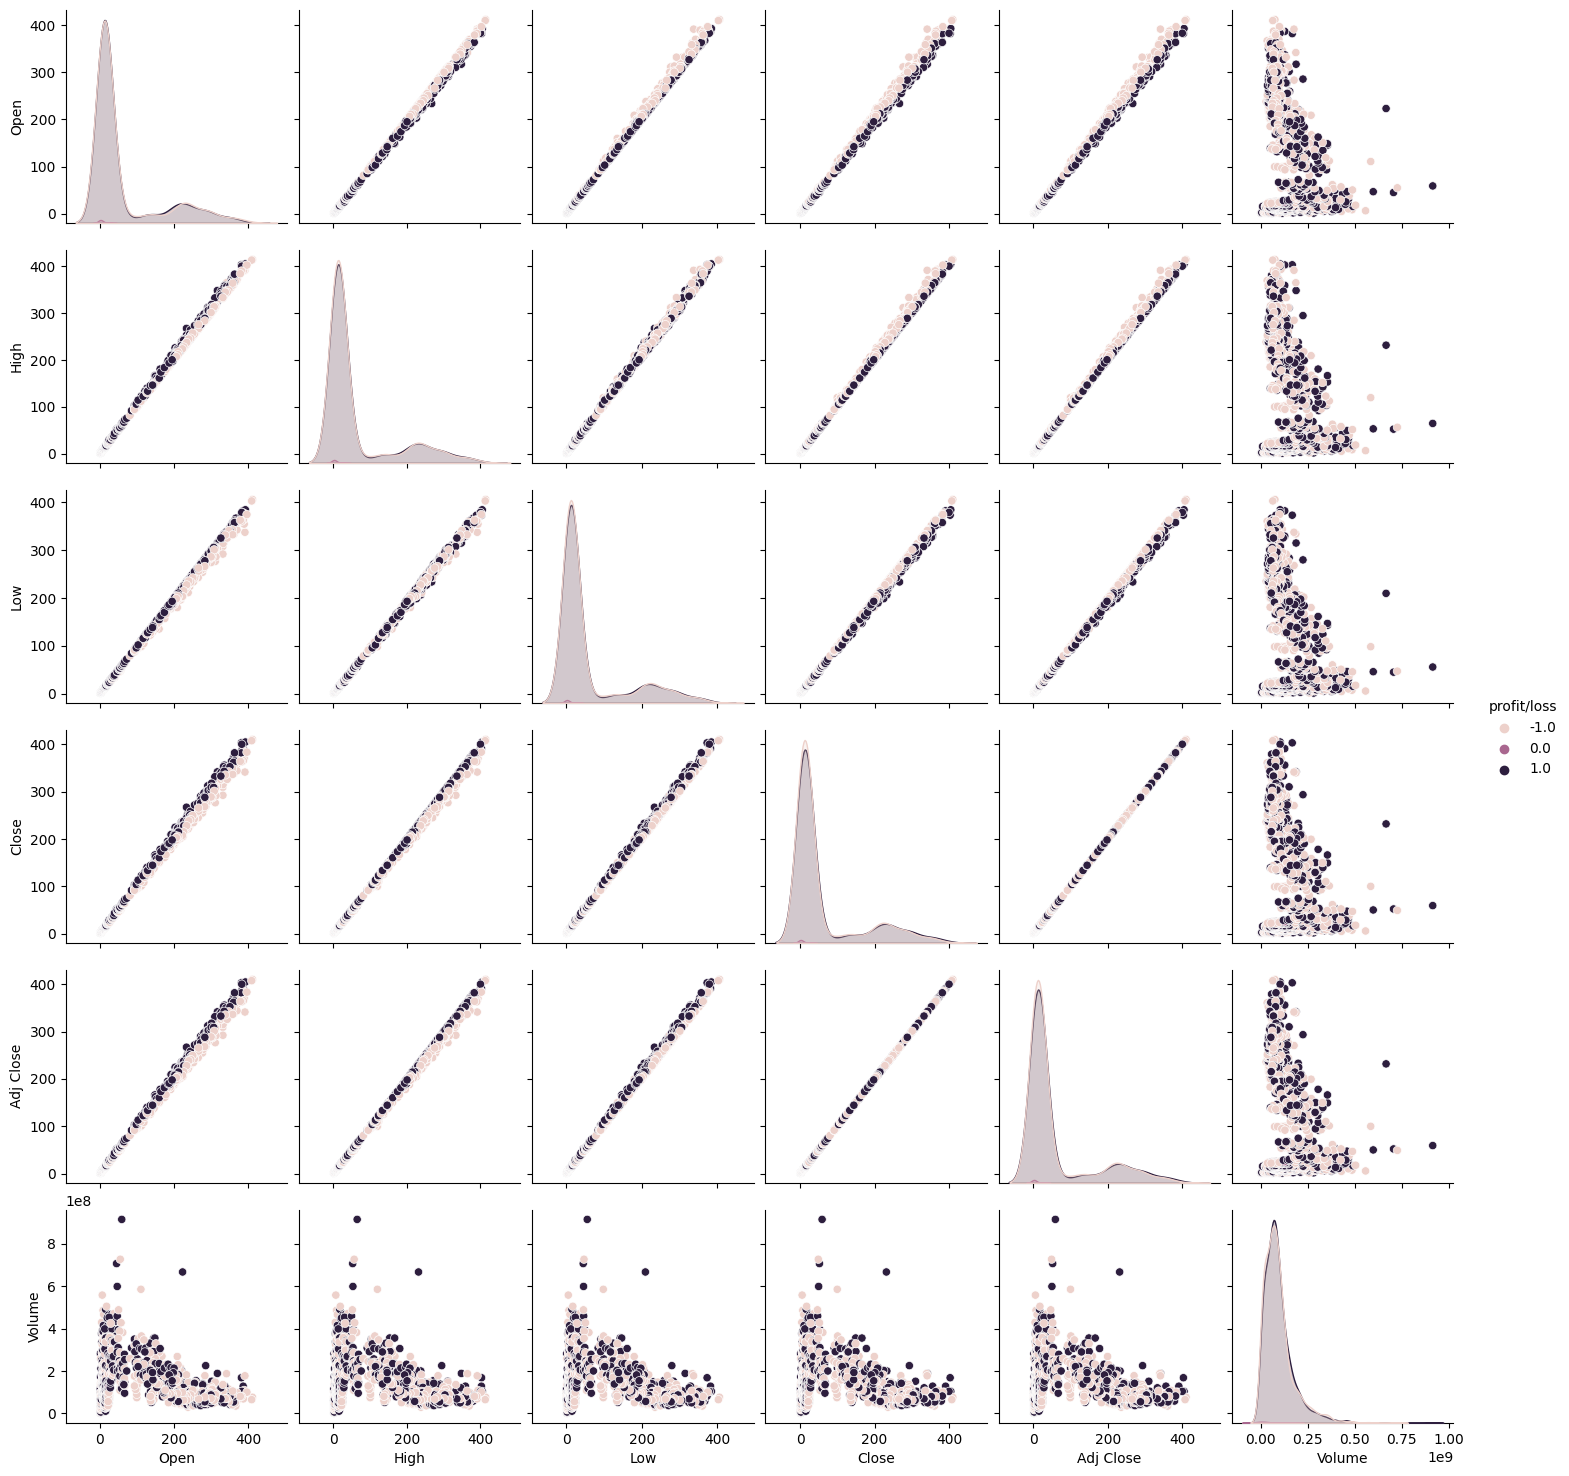

In [ ]:
import seaborn as sns
sns.pairplot(data=data1, hue='profit/loss')

<Axes: >

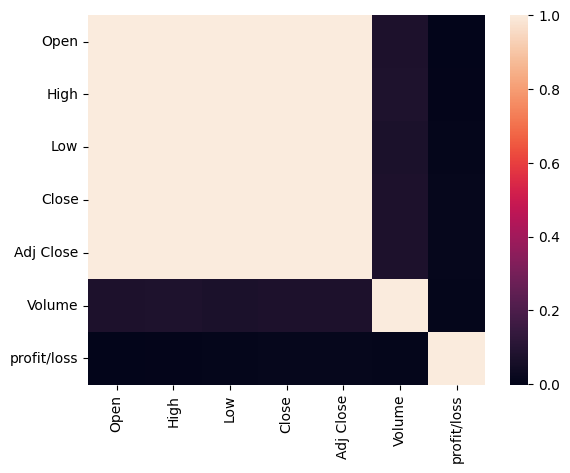

In [ ]:
##Correlation matrix
sns.heatmap(data1.corr())

In [ ]:
##Applying Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
##Prediction
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred=dtree.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       297
           2       0.96      0.96      0.96       342

    accuracy                           0.96       639
   macro avg       0.96      0.96      0.96       639
weighted avg       0.96      0.96      0.96       639



In [ ]:
##accuracy_score
ac=accuracy_score(y_test, y_pred)
ac

0.9624413145539906

Text(0.5, 1.0, 'Accuracy Score: 0.9624413145539906')

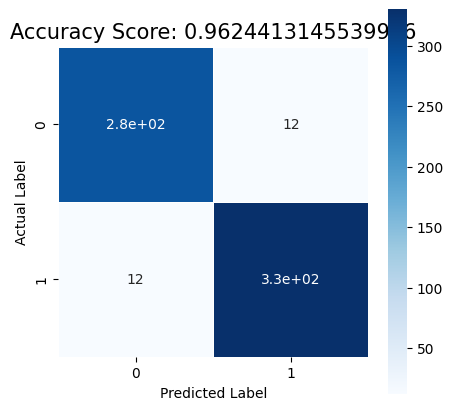

In [ ]:
##Confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=0.5, annot=True, square=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
##Constructing the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))
dec_tree=plot_tree(decision_tree=dtree,feature_names=data.columns, class_names=["Loss","None","Profit"], filled=True, precision=4, rounded=True)

K-means Clustering

In [ ]:
from sklearn.cluster import KMeans

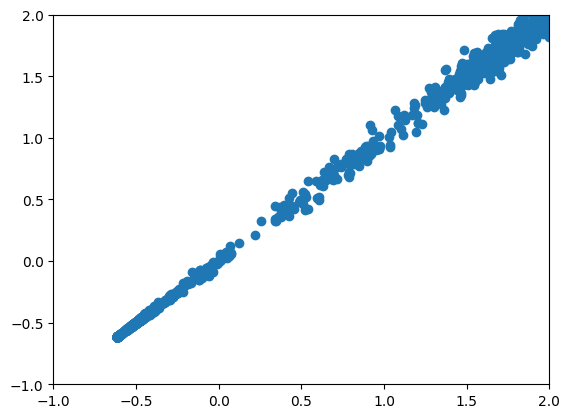

In [ ]:
plt.scatter(dfx['Open'],dfx['Adj Close'])
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show()

In [ ]:
##Performing slicing
x=dfx.iloc[:,[0,4]]
x.head()

,Open,Adj Close
0,-0.615400,-0.612359
1,-0.610680,-0.612401
2,-0.611229,-0.613703
3,-0.612619,-0.615624
4,-0.614705,-0.617774


In [ ]:
##Training the clustering model
kmeans=KMeans(5)
kmeans.fit(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

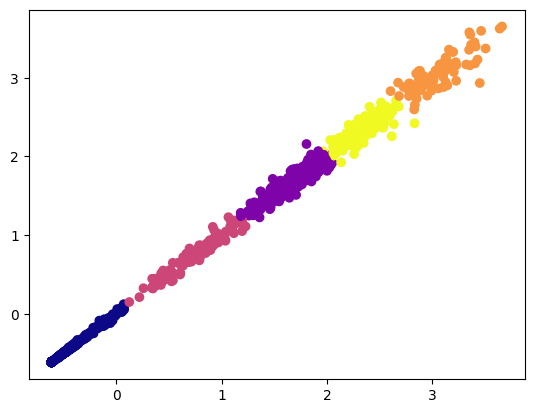

In [ ]:
data_with_clusters=dfx.copy()
data_with_clusters['Clusters']=identified_clusters
plt.scatter(data_with_clusters['Open'], data_with_clusters['Adj Close'], c=data_with_clusters['Clusters'], cmap='plasma')